# UnitedStates_COVID_19_dataset

This is the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Also, Supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL).

Coronavirus is a family of viruses that can cause illness, which can vary from common cold and cough to sometimes more severe disease. Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV) were such severe cases with the world already has faced. SARS-CoV-2 (n-coronavirus) is the new virus of the coronavirus family, which first discovered in 2019, which has not been identified in humans before. It is a contiguous virus which started from Wuhan in December 2019. Which later declared as Pandemic by WHO due to high rate spreads throughout the world. Currently (on the date 20 May 2020), this leads to a total of 300K+ Deaths across the globe, including 90K+ deaths alone in USA.The dataset  is provided to identify the deaths and recovered cases.

USA daily state reports (csse_covid_19_daily_reports_us)

This table contains an aggregation of each USA State level data. 

File naming convention
Field description
Province_State - The name of the State within the USA.
Country_Region - The name of the Country (US).
Last_Update - The most recent date the file was pushed.
Lat - Latitude.
Long_ - Longitude.
Confirmed - Aggregated confirmed case count for the state.
Deaths - Aggregated Death case count for the state.
Recovered - Aggregated Recovered case count for the state.
Active - Aggregated confirmed cases that have not been resolved (Active = Confirmed - Recovered - Deaths).
FIPS - Federal Information Processing Standards code that uniquely identifies counties within the USA.
Incident_Rate - confirmed cases per 100,000 persons.
People_Tested - Total number of people who have been tested.
People_Hospitalized - Total number of people hospitalized.
Mortality_Rate - Number recorded deaths * 100/ Number confirmed cases.
UID - Unique Identifier for each row entry.
ISO3 - Officialy assigned country code identifiers.
Testing_Rate - Total number of people tested per 100,000 persons.
Hospitalization_Rate - Total number of people hospitalized * 100/ Number of confirmed cases.


Field description
FIPS: US only. Federal Information Processing Standards code that uniquely identifies counties within the USA.
Admin2: County name. US only.
Province_State: Province, state or dependency name.
Country_Region: Country, region or sovereignty name. The names of locations included on the Website correspond with the official designations used by the U.S. Department of State.
Last Update: MM/DD/YYYY HH:mm:ss (24 hour format, in UTC).
Lat and Long_: Dot locations on the dashboard. All points (except for Australia) shown on the map are based on geographic centroids, and are not representative of a specific address, building or any location at a spatial scale finer than a province/state. Australian dots are located at the centroid of the largest city in each state.
Confirmed: Confirmed cases include presumptive positive cases and probable cases, in accordance with CDC guidelines as of April 14.
Deaths: Death totals in the US include confirmed and probable, in accordance with CDC guidelines as of April 14.
Recovered: Recovered cases outside China are estimates based on local media reports, and state and local reporting when available, and therefore may be substantially lower than the true number. US state-level recovered cases are from COVID Tracking Project.
Active: Active cases = total confirmed - total recovered - total deaths.
Incidence_Rate: Admin2 + Province_State + Country_Region.
Case-Fatality Ratio (%): = confirmed cases per 100,000 persons.
US Testing Rate: = total test results per 100,000 persons. The "total test results" is equal to "Total test results (Positive + Negative)" from COVID Tracking Project.
US Hospitalization Rate (%): = Total number hospitalized / Number confirmed cases. The "Total number hospitalized" is the "Hospitalized – Cumulative" count from COVID Tracking Project. The "hospitalization rate" and "hospitalized - Cumulative" data is only presented for those states which provide cumulative hospital data.

In [153]:
# Importing necesssary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [154]:
#Loading Dataset
df=pd.read_csv("csse_covid_19_daily_reports_us.csv")
df.head(20)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [155]:
# Shape
df.shape

(58, 18)

In [156]:
# Let's understand which features we can drop. Let's first describe the dataset
df.describe(include='all')

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
count,58,58,58,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,58,56.000000,33.000000
unique,58,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN
top,Puerto Rico,US,2020-05-21 02:32:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,NaN,NaN
freq,1,58,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,NaN,NaN
mean,NaN,NaN,NaN,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,NaN,3894.186870,14.342541
std,NaN,NaN,NaN,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,NaN,1933.169297,5.047403
min,NaN,NaN,NaN,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,NaN,97.702058,6.778043
25%,NaN,NaN,NaN,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,NaN,2712.800274,10.000000
50%,NaN,NaN,NaN,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,NaN,3469.782532,13.598326
75%,NaN,NaN,NaN,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,NaN,4763.649736,17.658649


# Features to drop:
1. Country_Region: All are US
2. Last_Update: This date is same for all
3. Active: Depends on other features (Active = Confirmed - Recovered - Deaths) (We'll do EDA before dropping)
4. FIPS: Federal Information Processing Standards code that uniquely identifies counties within the USA (Already have the State/County Names)
5. Incident_Rate (Dependent on other)
6. Mortality_Rate
7. UID - Id for row
8. ISO3 - County Identifier (Need to investigate further)
9. Testing_Rate	- Rate of testing
10. Hospitalization_Rate - Rate of Hospitalization

In [157]:
df['ISO3'].value_counts()

USA    53
PRI     1
ASM     1
GUM     1
MNP     1
VIR     1
Name: ISO3, dtype: int64

In [158]:
df[df['ISO3']!='USA']
# Let's drop these rows and then drop the feature ISO3

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
14,Guam,US,2020-05-21 02:32:54,13.4443,144.7937,154,5,125.0,24.0,66,93.771502,4972.0,NaN,3.246753,316,GUM,3027.479921,NaN
39,Northern Mariana Islands,US,2020-05-21 02:32:54,15.0979,145.6739,21,2,13.0,6.0,69,38.082112,3817.0,NaN,9.523810,580,MNP,6921.877267,NaN
44,Puerto Rico,US,2020-05-21 02:32:54,18.2208,-66.5901,2866,125,NaN,2741.0,72,97.702058,2866.0,NaN,4.361479,630,PRI,97.702058,NaN
52,Virgin Islands,US,2020-05-21 02:32:54,18.3358,-64.8963,69,6,61.0,2.0,78,64.324869,1383.0,NaN,8.695652,850,VIR,1289.294104,NaN


In [159]:
df.drop(df[df['ISO3']!='USA'].index, inplace = True) 

In [160]:
df.shape

(53, 18)

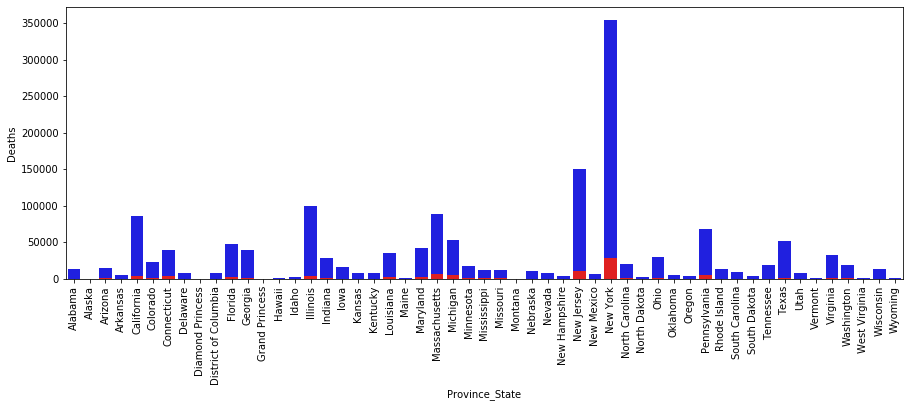

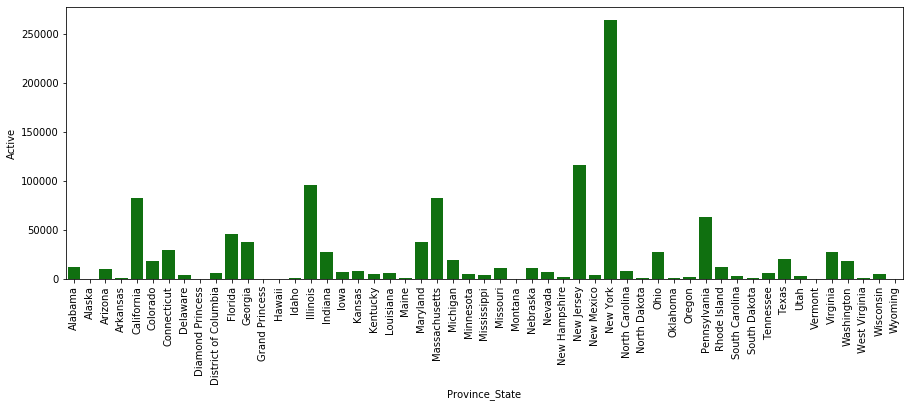

In [161]:
#Also, Let's see the Active Cases Plot before we drop that
# Plot column 'Confirmed'
plt.figure(figsize=(15,5))
sns.barplot(data = df, x = 'Province_State', y = 'Confirmed', color = 'blue')
#Plotting for Deaths
sns.barplot(data = df, x = 'Province_State', y = 'Deaths', color = 'red')
plt.xticks(rotation=90)
plt.show()
#Plotting for Active
plt.figure(figsize=(15,5))
sns.barplot(data = df, x = 'Province_State', y = 'Active', color = 'green')
plt.xticks(rotation=90)
plt.show()

In [162]:
# Above plots show that New York, New Jersey, Illinois, Massachusetts, Califormia and Pennsylvania 
#are some of the maximum affected states

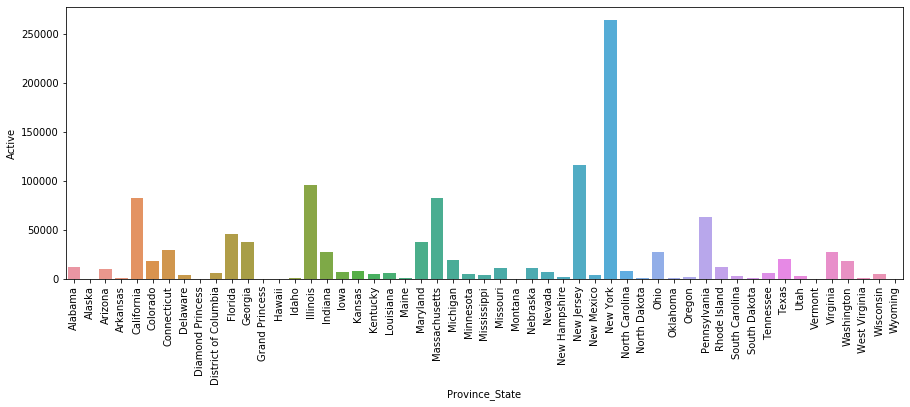

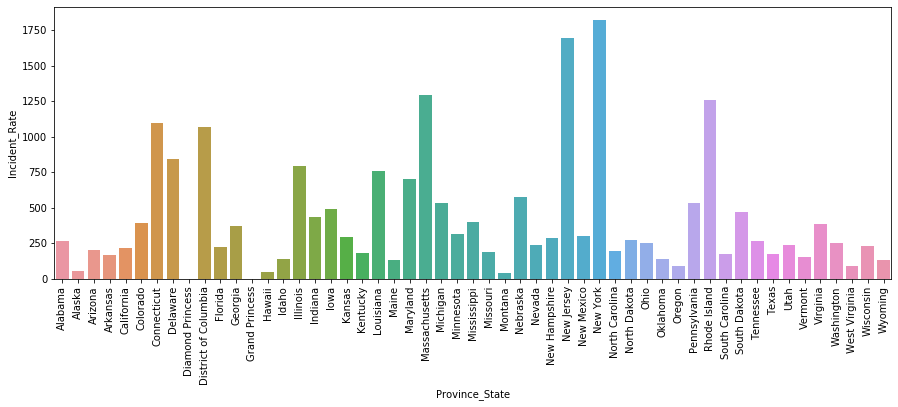

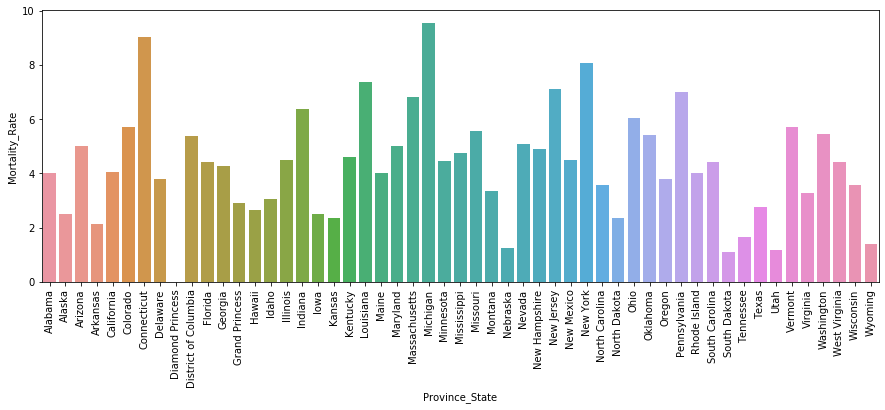

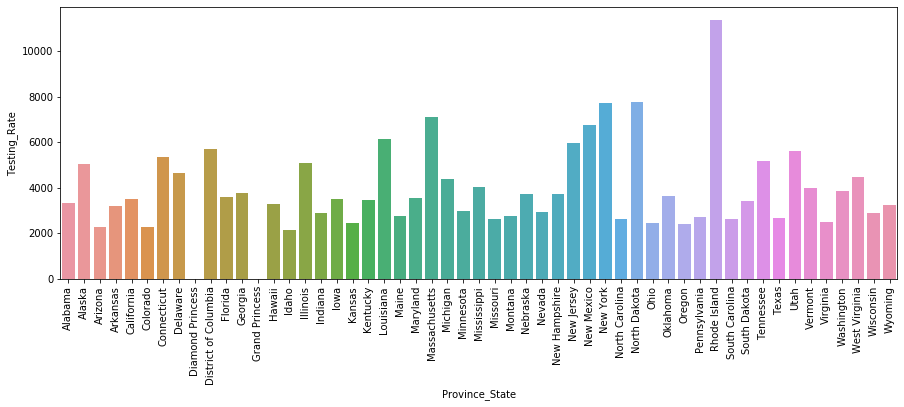

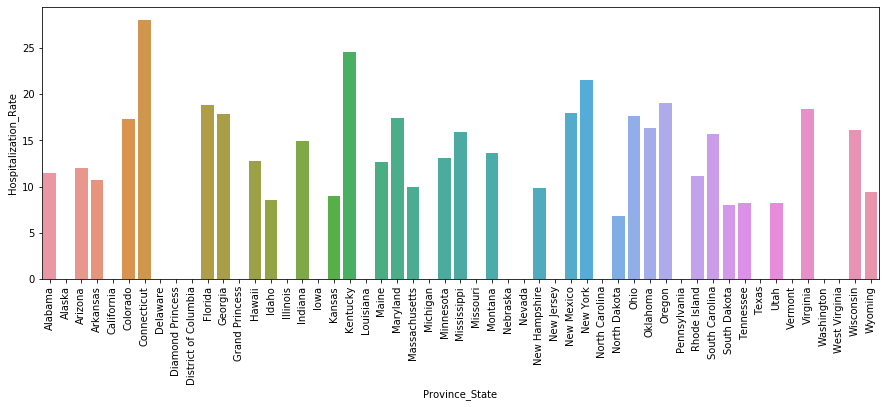

In [163]:
# Dropping object datatypes and unique features first
df.drop('Country_Region',axis=1,inplace=True)
df.drop('Last_Update',axis=1,inplace=True)
df.drop('ISO3',axis=1,inplace=True)
df.drop('UID',axis=1,inplace=True)
df.drop('FIPS',axis=1,inplace=True)
# List of columns to be removed
cols=['Active','Incident_Rate','Mortality_Rate','Testing_Rate','Hospitalization_Rate']
# Let's plot them before dropping
for i in cols:
    plt.figure(figsize=(15,5))
    sns.barplot(data = df, x = 'Province_State', y = i)
    plt.xticks(rotation=90)
    plt.show()
df.drop(cols,axis=1,inplace=True)

In [164]:
df.head(10)

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,People_Tested,People_Hospitalized
0,Alabama,32.3182,-86.9023,13052,522,NaN,164450.0,1493.0
1,Alaska,61.3707,-152.4044,401,10,352.0,37045.0,NaN
3,Arizona,33.7298,-111.4312,14906,747,3773.0,165435.0,1792.0
4,Arkansas,34.9697,-92.3731,5003,107,3852.0,96258.0,535.0
5,California,36.1162,-119.6816,85997,3497,NaN,1380120.0,NaN
6,Colorado,39.0598,-105.3111,22797,1299,3478.0,131837.0,3955.0
7,Connecticut,41.5978,-72.7554,39017,3529,6264.0,190718.0,10946.0
8,Delaware,39.3185,-75.5071,8194,310,3965.0,45412.0,NaN
9,Diamond Princess,NaN,NaN,49,0,NaN,NaN,NaN
10,District of Columbia,38.8974,-77.0268,7551,407,1059.0,40419.0,NaN


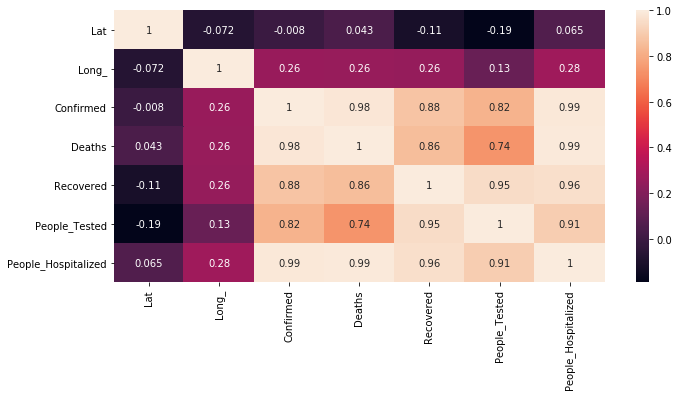

In [165]:
plt.figure(figsize=(11,5))
sns.heatmap(df.corr(),annot=True)
# A lot of features are highly correlated

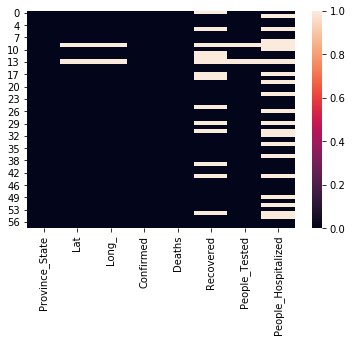

In [166]:
sns.heatmap(df.isnull())
# We see some Null Values

In [167]:
df.isnull().sum()

Province_State          0
Lat                     2
Long_                   2
Confirmed               0
Deaths                  0
Recovered              14
People_Tested           2
People_Hospitalized    20
dtype: int64

In [168]:
# Let's replace Null Values with 0
df = df.fillna(0) 

In [169]:
df.isnull().sum()
#Replaced rows with null values as imputing with means may cause errors

Province_State         0
Lat                    0
Long_                  0
Confirmed              0
Deaths                 0
Recovered              0
People_Tested          0
People_Hospitalized    0
dtype: int64

In [170]:
df.shape

(53, 8)

In [171]:
# Top 10 States based on Confirmed Cases
result = df.drop(columns=['Lat','Long_']).sort_values(by='Confirmed', ascending=False)[:10]
result

,Province_State,Confirmed,Deaths,Recovered,People_Tested,People_Hospitalized
36,New York,354370,28636,61886.0,1505836.0,76410.0
34,New Jersey,150776,10749,23945.0,531343.0,0.0
17,Illinois,100418,4525,0.0,642713.0,0.0
25,Massachusetts,88970,6066,0.0,489953.0,8897.0
5,California,85997,3497,0.0,1380120.0,0.0
43,Pennsylvania,68126,4770,0.0,349700.0,0.0
26,Michigan,53009,5060,28234.0,437072.0,0.0
49,Texas,51673,1426,30341.0,770241.0,0.0
11,Florida,47471,2096,0.0,771348.0,8934.0
24,Maryland,42323,2123,2993.0,215330.0,7393.0


In [172]:
# Top 10 States based on Deaths Cases
result = df.drop(columns=['Lat','Long_']).sort_values(by='Deaths', ascending=False)[:10]
result

,Province_State,Confirmed,Deaths,Recovered,People_Tested,People_Hospitalized
36,New York,354370,28636,61886.0,1505836.0,76410.0
34,New Jersey,150776,10749,23945.0,531343.0,0.0
25,Massachusetts,88970,6066,0.0,489953.0,8897.0
26,Michigan,53009,5060,28234.0,437072.0,0.0
43,Pennsylvania,68126,4770,0.0,349700.0,0.0
17,Illinois,100418,4525,0.0,642713.0,0.0
7,Connecticut,39017,3529,6264.0,190718.0,10946.0
5,California,85997,3497,0.0,1380120.0,0.0
22,Louisiana,35316,2608,26249.0,285970.0,0.0
24,Maryland,42323,2123,2993.0,215330.0,7393.0


In [173]:
# Top 10 States based on Recovered Cases
result = df.drop(columns=['Lat','Long_']).sort_values(by='Recovered', ascending=False)[:10]
result

,Province_State,Confirmed,Deaths,Recovered,People_Tested,People_Hospitalized
36,New York,354370,28636,61886.0,1505836.0,76410.0
49,Texas,51673,1426,30341.0,770241.0,0.0
26,Michigan,53009,5060,28234.0,437072.0,0.0
22,Louisiana,35316,2608,26249.0,285970.0,0.0
34,New Jersey,150776,10749,23945.0,531343.0,0.0
27,Minnesota,17670,786,12227.0,167338.0,2308.0
48,Tennessee,18412,305,11783.0,354013.0,1515.0
37,North Carolina,20262,726,11637.0,277603.0,0.0
19,Iowa,15620,393,8362.0,110748.0,0.0
56,Wisconsin,13413,481,7728.0,167713.0,2161.0


In [174]:
# Top 10 States based on People_Tested
result = df.drop(columns=['Lat','Long_']).sort_values(by='People_Tested', ascending=False)[:10]
result

,Province_State,Confirmed,Deaths,Recovered,People_Tested,People_Hospitalized
36,New York,354370,28636,61886.0,1505836.0,76410.0
5,California,85997,3497,0.0,1380120.0,0.0
11,Florida,47471,2096,0.0,771348.0,8934.0
49,Texas,51673,1426,30341.0,770241.0,0.0
17,Illinois,100418,4525,0.0,642713.0,0.0
34,New Jersey,150776,10749,23945.0,531343.0,0.0
25,Massachusetts,88970,6066,0.0,489953.0,8897.0
26,Michigan,53009,5060,28234.0,437072.0,0.0
12,Georgia,39801,1697,0.0,402940.0,7107.0
48,Tennessee,18412,305,11783.0,354013.0,1515.0


In [175]:
# Top 10 States based on People_Hospitalized
result = df.drop(columns=['Lat','Long_']).sort_values(by='People_Hospitalized', ascending=False)[:10]
result

# New Jersey, which has high no. of Confirmed cases is absent from the top 10 list of hospitalized. This requires some action.

,Province_State,Confirmed,Deaths,Recovered,People_Tested,People_Hospitalized
36,New York,354370,28636,61886.0,1505836.0,76410.0
7,Connecticut,39017,3529,6264.0,190718.0,10946.0
11,Florida,47471,2096,0.0,771348.0,8934.0
25,Massachusetts,88970,6066,0.0,489953.0,8897.0
24,Maryland,42323,2123,2993.0,215330.0,7393.0
12,Georgia,39801,1697,0.0,402940.0,7107.0
53,Virginia,32908,1075,4523.0,212626.0,6059.0
40,Ohio,29436,1781,0.0,289528.0,5198.0
18,Indiana,29274,1864,0.0,195738.0,4389.0
6,Colorado,22797,1299,3478.0,131837.0,3955.0


In [176]:
#Let's Label Encode Date and Country Features

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Province_State']=le.fit_transform(df['Province_State'])

In [177]:
# Treating for outliers
from scipy.stats import zscore
z = abs(zscore(df))
print(df.shape)
df=df[(z<3).all(axis=1)]
print(df.shape)

# 4 rows removed

(53, 8)
(49, 8)


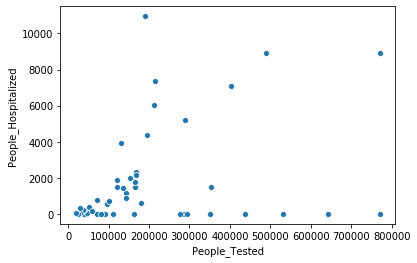

In [178]:
# Let's see the relation between people hospitalized vs people tested
sns.scatterplot(data=df,x='People_Tested',y='People_Hospitalized')

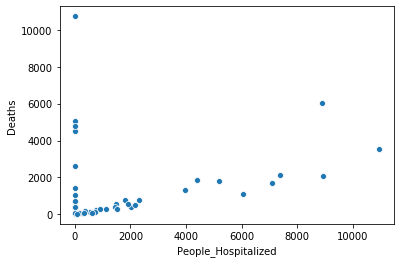

In [179]:
# Let's see the relation between people hospitalized vs Deaths
sns.scatterplot(data=df,x='People_Hospitalized',y='Deaths')

In [180]:
# Checking for skewness
df.skew()
# We need to treat

Province_State        -0.079032
Lat                    0.227474
Long_                 -1.453176
Confirmed              2.527166
Deaths                 2.924733
Recovered              2.336461
People_Tested          1.670612
People_Hospitalized    1.921944
dtype: float64

In [181]:
# Treating for skewness
for col in df.columns:
    if df[col].dtypes!="object":
        if df.skew().loc[col]>0.55:
            df[col]=np.log1p(df[col])
        if df.skew().loc[col]<-0.55:
            df[col]=np.square(df[col])
df.skew()

Province_State        -0.079032
Lat                    0.227474
Long_                  2.125921
Confirmed             -0.488106
Deaths                -0.291220
Recovered             -0.299113
People_Tested         -0.104514
People_Hospitalized   -0.348948
dtype: float64

In [182]:
df.isnull().sum()

Province_State         0
Lat                    0
Long_                  0
Confirmed              0
Deaths                 0
Recovered              0
People_Tested          0
People_Hospitalized    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000053CDEBAA88>,
      dtype=object)

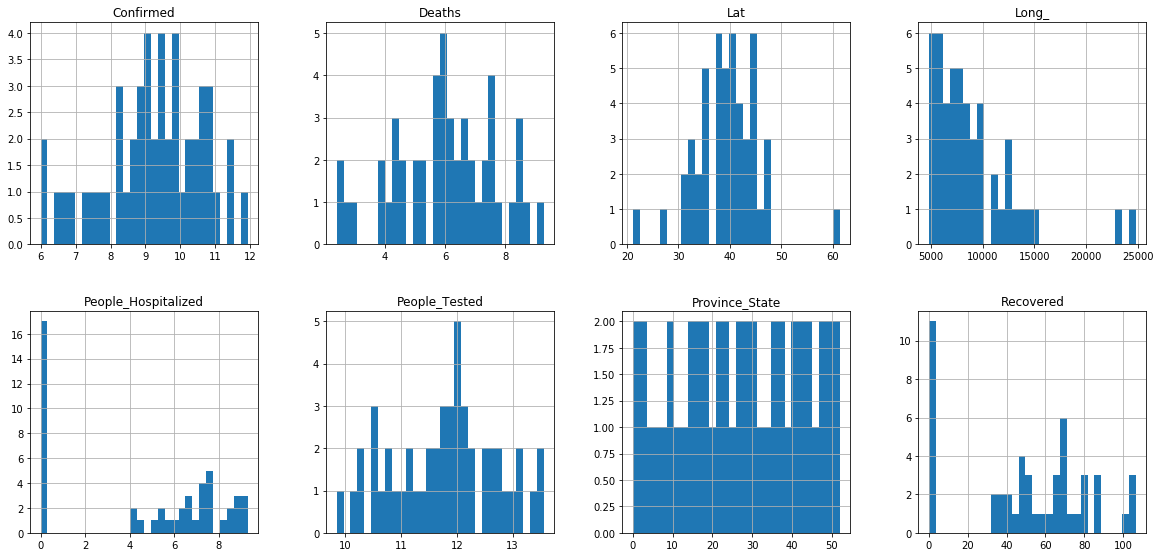

In [183]:
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)
# Now most of them seem to be Normally distributed

In [185]:
# Let's Separate our dataset into Features and target
df_x=df.drop(columns=["Deaths"])
y=df[["Deaths"]]

In [186]:
# Let's do Standard Scaling on the Continous variables (x)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x.head()

,Province_State,Lat,Long_,Confirmed,Recovered,People_Tested,People_Hospitalized
0,-1.774652,-1.169893,-0.365744,0.162835,-1.551903,0.228961,0.751193
1,-1.708775,3.583805,3.484806,-2.312202,-0.494455,-1.367188,-1.296493
2,-1.642898,-0.938921,0.829308,0.257285,0.532235,0.235356,0.802302
3,-1.577020,-0.736043,-0.124818,-0.519004,0.542734,-0.344589,0.464016
4,-1.445266,-0.066803,0.503460,0.559412,0.491246,-0.007753,1.023998


In [187]:
#to find random stat which gives maximum r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(model,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [188]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [189]:
# Linear Regression

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
r_state=maxr2_score(lr,x,y)

max r2 score corresponding to  96  is  0.9722397197231394


In [190]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,50,100,150,200,250,500]}
clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 100}

In [191]:
rfr=RandomForestRegressor(n_estimators=100)
r_state=maxr2_score(rfr,x,y)

max r2 score corresponding to  96  is  0.96852350150056


In [192]:
# KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
parameters = {"n_neighbors":range(2,20)}
clf = GridSearchCV(knr, parameters, cv=5,scoring="r2")
clf.fit(x, y)
clf.best_params_

{'n_neighbors': 7}

In [193]:
knr=KNeighborsRegressor(n_neighbors=7)
r_state=maxr2_score(knr,x,y)

max r2 score corresponding to  81  is  0.877011990406562


In [194]:
# SVM

from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")
svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svr, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [195]:
svr=SVR(kernel="linear",C=1)
r_state=maxr2_score(svr,x,y) 

max r2 score corresponding to  96  is  0.9621017515887923


# Cross Validation

In [197]:
print("\n\nLinear Regression\n\n")
model_evaluation(lr,x,y)

print("\n\nRandomForestRegressor\n\n")
model_evaluation(rfr,x,y)


print("\n\nKNeighborsRegressor\n\n")
model_evaluation(knr,x,y)

print("\n\nSVM REGRESSOR\n\n")
model_evaluation(svr,x,y)



Linear Regression


Mean r2 score for regressor:  0.8714388537591627
standard deviation in r2 score for regressor:  0.06147760109986138
[0.88485123 0.90902521 0.91818308 0.89448047 0.75065428]


RandomForestRegressor


Mean r2 score for regressor:  0.8580961236498317
standard deviation in r2 score for regressor:  0.08665764614284244
[0.84095858 0.95564405 0.85736496 0.92907961 0.70743341]


KNeighborsRegressor


Mean r2 score for regressor:  0.7054067750223061
standard deviation in r2 score for regressor:  0.07018608956198046
[0.65766199 0.70441416 0.62789468 0.83323196 0.70383109]


SVM REGRESSOR


Mean r2 score for regressor:  0.8667833454437007
standard deviation in r2 score for regressor:  0.0748972169995825
[0.86892607 0.93402441 0.90941042 0.89861792 0.72293792]


In [198]:
# Based on above results let's select Linear Regression

In [199]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 96,test_size=0.20)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [200]:
#Lets find the rmse and r2_score using sklearn.metrics for SVM model
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  0.26622725964325344
r2_score is:  0.9722397197231394


In [201]:
from sklearn.externals import joblib
joblib.dump(lr,'Covid_19.pkl')

['Covid_19.pkl']